In [17]:
# %pip install scikit-learn

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


In [19]:
df_courses = pd.read_csv('../dataset/courses.csv')
df_chapters = pd.read_csv('../dataset/chapters.csv')
df_employees = pd.read_csv('../dataset/employees.csv')
df_course_progress = pd.read_csv('../dataset/courseProgress.csv')
df_feedbacks = pd.read_csv('../dataset/feedbacks.csv')
df_quiz_scores = pd.read_csv('../dataset/quiz.csv')

In [20]:


df_quiz = df_quiz_scores.merge(df_chapters[['id', 'courseId']], left_on='chapterId', right_on='id', how='left')

df_quiz = df_quiz.drop(columns=['id','Unnamed: 0'])

df_courses = df_courses.drop(columns=['totalQuiz'])

courses = df_quiz.groupby('courseId').size().reset_index(name='totalQuiz')

df_courses = pd.merge(df_courses, courses, left_on='id', right_on='courseId', how='left')

df_courses = df_courses.drop(columns=['courseId','Unnamed: 0'])

In [21]:
df_course_progress['avg_time_per_chapter'] = df_course_progress['timeSpent'] / df_course_progress['completedChapters']

df_feedbacks['feedback_submitted'] = df_feedbacks['response'].apply(lambda x: 1 if not pd.isna(x) else 0)

df_quiz['quiz_completion'] = df_quiz.apply(lambda x: 1 if x['score'] > 0 else 0, axis=1)


In [22]:
merged_data = pd.merge(df_course_progress, df_employees, left_on='employeeId', right_on='id', how='left')

merged_data = pd.merge(merged_data, df_courses, left_on='courseId', right_on='id', how='left')

merged_data = pd.merge(merged_data, df_feedbacks[['employeeId', 'courseId', 'feedback_submitted']], on=['employeeId', 'courseId'], how='left')

merged_data = pd.merge(merged_data, df_quiz[['employeeId', 'courseId', 'quiz_completion']], on=['employeeId', 'courseId'], how='left')

merged_data = merged_data.drop(columns=['id_x','id','Unnamed: 0','department.1','Unnamed: 1','id_y'])

display(merged_data.columns)

Index(['employeeId', 'courseId', 'progress', 'completedChapters', 'timeSpent',
       'status', 'startedAt_x', 'updatedAt', 'avg_time_per_chapter',
       'department', 'email', 'name', 'team', 'title', 'description',
       'startedAt_y', 'totalChapter', 'totalQuiz', 'feedback_submitted',
       'quiz_completion'],
      dtype='object')

In [23]:
merged_data['engagement_trend'] = merged_data.groupby('employeeId')['timeSpent'].diff().fillna(0)

mean_time = merged_data['timeSpent'].mean()

merged_data['will_engage'] = merged_data['timeSpent'].apply(lambda x: 1 if x > mean_time else 0)


In [24]:
merged_data = merged_data.fillna(0)


In [25]:
print(merged_data.isnull().sum())

employeeId              0
courseId                0
progress                0
completedChapters       0
timeSpent               0
status                  0
startedAt_x             0
updatedAt               0
avg_time_per_chapter    0
department              0
email                   0
name                    0
team                    0
title                   0
description             0
startedAt_y             0
totalChapter            0
totalQuiz               0
feedback_submitted      0
quiz_completion         0
engagement_trend        0
will_engage             0
dtype: int64


In [26]:
display(merged_data['will_engage'].value_counts())

will_engage
0    639
1    614
Name: count, dtype: int64

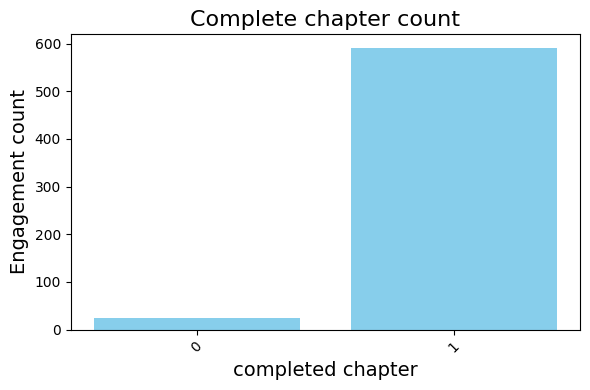

In [27]:

status_count = (merged_data.loc[merged_data['will_engage']==1]).groupby('quiz_completion').size().reset_index(name='count')

plt.figure(figsize=(6,4))
plt.bar(status_count['quiz_completion'], status_count['count'], color='skyblue')
plt.title('Complete chapter count', fontsize=16)
plt.xlabel('completed chapter', fontsize=14)
plt.ylabel('Engagement count', fontsize=14)
plt.xticks(rotation=45)
x_min = status_count['quiz_completion'].min()
x_max = status_count['quiz_completion'].max()
plt.xticks(np.arange(x_min, x_max + 1, 1)) 
plt.tight_layout()

plt.show()

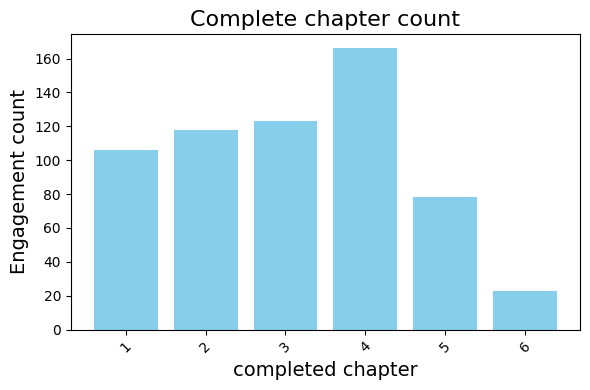

In [28]:

status_count = (merged_data.loc[merged_data['will_engage']==1]).groupby('completedChapters').size().reset_index(name='count')

plt.figure(figsize=(6,4))
plt.bar(status_count['completedChapters'], status_count['count'], color='skyblue')
plt.title('Complete chapter count', fontsize=16)
plt.xlabel('completed chapter', fontsize=14)
plt.ylabel('Engagement count', fontsize=14)
plt.xticks(rotation=45)
x_min = status_count['completedChapters'].min()
x_max = status_count['completedChapters'].max()
plt.xticks(np.arange(x_min, x_max + 1, 1)) 
plt.tight_layout()

plt.show()

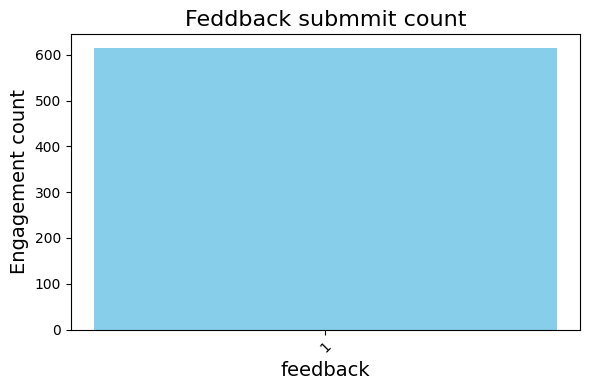

In [29]:

status_count = (merged_data.loc[merged_data['will_engage']==1]).groupby('feedback_submitted').size().reset_index(name='count')

plt.figure(figsize=(6,4))
plt.bar(status_count['feedback_submitted'], status_count['count'], color='skyblue')
plt.title('Feddback submmit count', fontsize=16)
plt.xlabel('feedback', fontsize=14)
plt.ylabel('Engagement count', fontsize=14)
plt.xticks(rotation=45)
x_min = status_count['feedback_submitted'].min()
x_max = status_count['feedback_submitted'].max()
plt.xticks(np.arange(x_min, x_max + 1, 1)) 
plt.tight_layout()

plt.show()

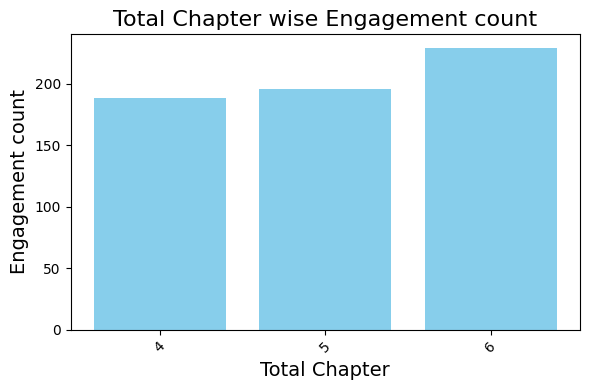

In [30]:

status_count = (merged_data.loc[merged_data['will_engage']==1]).groupby('totalChapter').size().reset_index(name='count')

plt.figure(figsize=(6,4))
plt.bar(status_count['totalChapter'], status_count['count'], color='skyblue')
plt.title('Total Chapter wise Engagement count', fontsize=16)
plt.xlabel('Total Chapter', fontsize=14)
plt.ylabel('Engagement count', fontsize=14)
plt.xticks(rotation=45)
x_min = status_count['totalChapter'].min()
x_max = status_count['totalChapter'].max()
plt.xticks(np.arange(x_min, x_max + 1, 1)) 
plt.tight_layout()

plt.show()

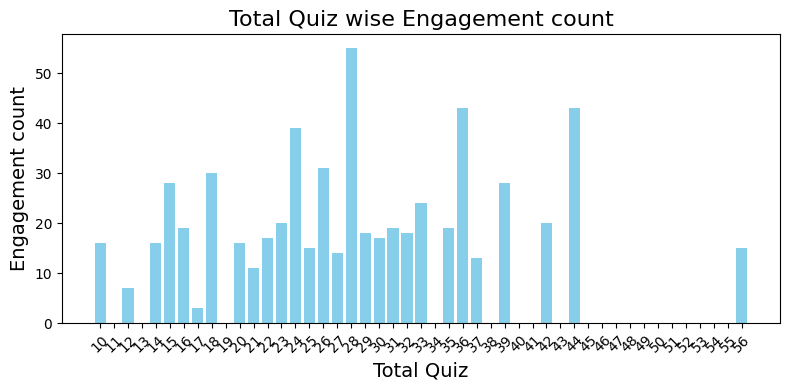

In [31]:

total_quiz_count = (merged_data.loc[merged_data['will_engage']==1]).groupby('totalQuiz').size().reset_index(name='count')

plt.figure(figsize=(8,4))
plt.bar(total_quiz_count['totalQuiz'], total_quiz_count['count'], color='skyblue')
plt.title('Total Quiz wise Engagement count', fontsize=16)
plt.xlabel('Total Quiz', fontsize=14)
plt.ylabel('Engagement count', fontsize=14)
plt.xticks(rotation=45)
x_min = total_quiz_count['totalQuiz'].min()
x_max = total_quiz_count['totalQuiz'].max()
plt.xticks(np.arange(x_min, x_max + 1, 1)) 
plt.tight_layout()

plt.show()

Accuracy: 0.7569721115537849
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       124
           1       0.78      0.73      0.75       127

    accuracy                           0.76       251
   macro avg       0.76      0.76      0.76       251
weighted avg       0.76      0.76      0.76       251



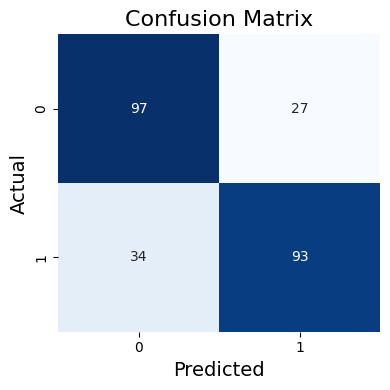

In [32]:
X = merged_data[['quiz_completion', 'totalChapter', 'totalQuiz', 'completedChapters']]
y = merged_data['will_engage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.tight_layout()

plt.show()

